<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/redesneuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Redes neuronales**

Patricia Mediavilla Pardilla

Lo primero que debemos hacer para poder realizar un algoritmo de clasificación ya sea por SVM o por redes neuronales es importar las Base de datos con los datos que debemos utilizar. Así como importar las libreriías con las que vamos a trabajar, en este caso la red neuronal la vamos a realizar con Pythorch.

Y realizar un preprocesamiento de los datos para poder utilizarlos de manera correcta.

In [1]:
import numpy as np
import pandas as pd

# Input data files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Importamos las librerias necesarias y cargamos la base de datos
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
df1 = pd.read_csv('Iris.csv',sep=',')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Una vez cargada la base de datos debemos comprenderla.

En este caso es una base de datos de flores, la clase se define en Species y los datos que determina que tipos de flor es, se encuentran en estas variables:
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

Continuamos con el preprocesamiento de los datos para ello vamos ver si hay valores faltantes y si hay outliers. En el caso que encontremos alguno debemos tratar con estos.

In [2]:
df1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Como vemos no hay ni valores faltantes ni valores atípicos por lo que podemos empezar nuestro algortimo.

In [4]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

get_info_dataframe(df1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

DATAFRAME MISSING INFO - 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

DATAFRAME SHAPE INFO - 

(150, 6)


Así reconocemos la base de datos y vemos la información que nos proporcionan

## Clásico

Para poder crear un modelo de predicción basado en redes neuronale clásico es necesario no tener columnas tipo indice, todos datos que nos interesen.Así como que los rangos de los valores tine que coincidir con la función de activación.


En una red neuronal tenemos tres cosas: entrada, pesos y función de activación

Puedo definirme funciones más o menos complicadaas de funciones de activación, una forma de decidir cómo mido el Measurement para ver a partir de qué límite es 0 o 1

Para que el problema sea más simple vamos a dejar dos clases de flores en lugar de 3. Para ello vamos a ver cuales son los tipos de flores.

In [5]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df1 = df1[(df1['Species']=='Iris-virginica') | (df1['Species']=='Iris-versicolor')]
df1['Species'] = df1['Species'].map({'Iris-virginica':0,'Iris-versicolor':1})
df1.drop(['Id'],axis=1,inplace=True)
df1

<ipython-input-6-e0af751cbea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Species'] = df1['Species'].map({'Iris-virginica':0,'Iris-versicolor':1})
<ipython-input-6-e0af751cbea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Id'],axis=1,inplace=True)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [7]:
X = df1.drop(["Species"],axis=1).values
y = df1["Species"].values

Para realizar las redes neuronales vamos a ir explicando las funciones lo que hacen y como funcionan

- Standarscaler()-> los escala, hace que se muevan al rededor del 0 porque les resta la media y los divide por la desviación (tipificar).

Antes de hacer el escalado de los datos tengo que dividir el conjunto de los datos entre train y test. Solo se hace en los de train (el escalarlos) porque de otra manera sería trampa, y los de test los va a transformar en respecto a los de train, con la media y la desviación de los de train. Así conseguimos que no se nos engañe.

- FloatTensor() -> lo pasa de array a tensor con decimales (crea una matriz)
- LongTensor() -> lo pasa de array a tensor con enteros

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
scaler = StandardScaler()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Para crear la red neuronal definimos una clase que contine dos funciones:
 - La primera define las capas (variables) así como su forma y tamaño

 Layer= nn.Linear(número de entrada de neuronas,número de salida de neuronas(número de parámetros). Estas capas que estamos definiendo deben estar entrelazadas entre sí, por lo que la salida de una tiene que ser la entrada de la siguente.
 El tipo de capas  puede tener diferentes funciones como puede ser: Lineal **/** y Relu **_/**

 - La segunda función lo que hace es que entrelaza las capas creadas, creando así una capa oculta que recalcula pesos constantmente, y por último una capa de salida que es mi solución que me clasifica en 0 o 1 basado en probabilidades



In [12]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,4)
        self.hidden_layer1  = nn.Linear(4,2)
        self.hidden_layer2  = nn.Linear(2,4)
        self.output_layer   = nn.Linear(4,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        out =  self.output_layer(out)
        return out

Ahora vamos a definir 'las dimensiones' de la red neuronal. La dimensión de los datos que se introducen se definen en la variable **inputdim**, así como la dimención de salida, es decir la cantidad de tipos de flores que tenemos, estas se almacenan en la varible **outputdim**



In [13]:
input_dim  = 4  #because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
output_dim = 2  #because we have namely 2 categories setosa,versicolor and virginica eliminando una
model = NeuralNetworkClassificationModel(input_dim,output_dim)

La función NeuralNetworkClassificationModel(nn.Module):nos vale para cualquier tamaño de entrada y de salida, y es más adelante con lo de input_dim que definimos la dimensión



- learning_rate = La tasa de aprendizaje controla qué tan grande son los pasos de actualización de los pesos durante el proceso de optimización. En general me define de cuanto en cuando avanzo y va hacia el minimo y se queda en él, sirve para ver los minimos y buscar los minimos. Si ponemos un learning rate va a dar saltos muy grandes y aprender poco. Si es muy pequeño tardará un montón y cabe la posibilidad que se quede atascado en un minimo.

- criterion = nn.CrossEntropyLoss(): Define la función de pérdida que se utilizará durante el entrenamiento. En este caso, se está utilizando la pérdida de entropía cruzada, que es comúnmente utilizada en problemas de clasificación.

- optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate): Crea un objeto de optimizador Adam. Adam es un algoritmo de optimización popular que adapta la tasa de aprendizaje para cada parámetro de forma individual. model.parameters() proporciona todos los parámetros del modelo que deben ser optimizados, y lr=learning_rate establece la tasa de aprendizaje del optimizador

In [14]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

En esta parte lo que vamos a hacer es:
- optimizer.zero_grad(): Esta línea se encarga de resetear los gradientes acumulados de los parámetros del modelo.

- output_train = model(X_train): Realiza la propagación hacia adelante (forward pass) del modelo con los datos de entrenamiento (X_train). output_train contiene las predicciones del modelo.

- loss_train = criterion(output_train, y_train): Calcula la pérdida entre las predicciones del modelo (output_train) y las etiquetas reales (y_train) utilizando la función de pérdida especificada (criterion). Esta pérdida se utilizará para retropropagar los gradientes y ajustar los pesos del modelo.

- loss_train.backward(): Realiza la retropropagación para calcular los gradientes de la pérdida con respecto a los parámetros del modelo.

- optimizer.step(): Actualiza los pesos del modelo utilizando el optimizador, que utiliza los gradientes calculados durante la retropropagación.

- output_test = model(X_test): Realiza la propagación hacia adelante del modelo con los datos de prueba (X_test) para evaluar el rendimiento del modelo en el conjunto de prueba.

- loss_test = criterion(output_test, y_test): Calcula la pérdida en el conjunto de prueba usando las predicciones del modelo (output_test) y las etiquetas reales (y_test).

- train_losses[epoch] = loss_train.item() y test_losses[epoch] = loss_test.item(): Guarda las pérdidas de entrenamiento y prueba en las listas train_losses y test_losses respectivamente, para su posterior análisis o visualización.



Básicamente lo que hacemos es que metemos los datos en una rueda de reentrenamiento para los datos que son temporales, que vayan variando con el tiempo, para que se vaya actualizando, y ajustando los pesos. Hay que tener en cuenta el coste de esto, tanto de entrenarlo como de ir recopilando de los datos.

Luego hay que probar qué pasa si metemos más capas: se sobreentrena antes.

Hay que buscar el equilibrio entre pocas capas y muchas neuronas, muchas capas y pocas neuronas y un equilibrio entre medias.

Con dos capas funciona peor que con una. Por que una capa grande es la que hace bien la suda de los pesos, si meto más se pueden fastidiar unas a otras. Pero hay veces que si se complementan bien, pueden ser más y que se usan más de una capa.

In [15]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)



        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()


        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")



Pytorch hace la derivada de manera numérica, para cada uno de los pesos le añade algo o le resta algo : (w(i)*delta - w(j)*delta) /2delta)

Los pesos al principio se hacen al azar, y se van ajustando poco a poco.

De output podemos poner simplemente 1 neurona, ya que al ser una clasificación binaria, puedo tener 1 u 0.

In [16]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

Utilizo la función que he definido para poder entrenar el modelo y podamos sacar resultados.

In [17]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)


Epoch 50/1000, Train Loss: 0.4836, Test Loss: 0.5099
Epoch 100/1000, Train Loss: 0.0325, Test Loss: 0.2180
Epoch 150/1000, Train Loss: 0.0110, Test Loss: 0.2819
Epoch 200/1000, Train Loss: 0.0060, Test Loss: 0.3139
Epoch 250/1000, Train Loss: 0.0037, Test Loss: 0.3406
Epoch 300/1000, Train Loss: 0.0025, Test Loss: 0.3656
Epoch 350/1000, Train Loss: 0.0018, Test Loss: 0.3886
Epoch 400/1000, Train Loss: 0.0013, Test Loss: 0.4108
Epoch 450/1000, Train Loss: 0.0010, Test Loss: 0.4284
Epoch 500/1000, Train Loss: 0.0009, Test Loss: 0.4430
Epoch 550/1000, Train Loss: 0.0007, Test Loss: 0.4541
Epoch 600/1000, Train Loss: 0.0006, Test Loss: 0.4689
Epoch 650/1000, Train Loss: 0.0005, Test Loss: 0.4859
Epoch 700/1000, Train Loss: 0.0004, Test Loss: 0.4967
Epoch 750/1000, Train Loss: 0.0004, Test Loss: 0.5079
Epoch 800/1000, Train Loss: 0.0003, Test Loss: 0.5131
Epoch 850/1000, Train Loss: 0.0003, Test Loss: 0.5221
Epoch 900/1000, Train Loss: 0.0003, Test Loss: 0.5389
Epoch 950/1000, Train Loss: 0

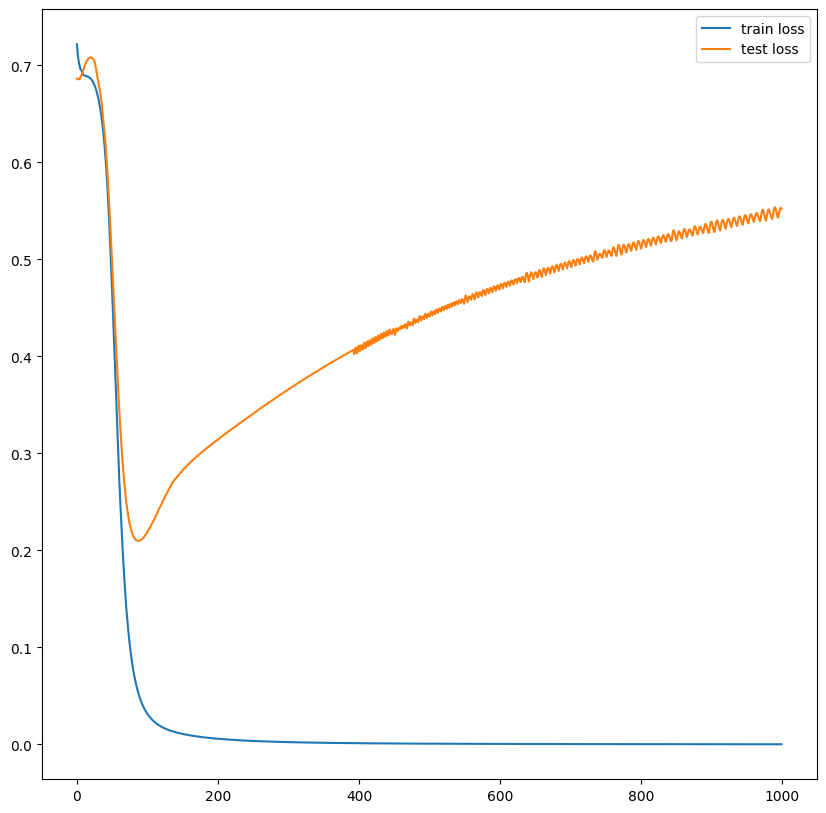

In [18]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [19]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

La función que vamos a definir nos va a sacar la precisión del modelo.

In [20]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [21]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [22]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 100.0
Test Accuracy: 83.333


Observamos la precisión del modelo, tanto de los datos de entrenamiento como la precisión de los datos de validación.

##CUÁNTICO

Para crear una red neuronal cuántica vamos a tener que seguir unos pasos determinados.

- Circuito Cuántico:

Creas un circuito cuántico con un número variable de qubits.
Aplicas puertas de Hadamard al principio y al final del circuito para anular sus efectos. Intercalas puertas de doble CNOT (Controlled-NOT) y rotaciones en el eje para entrelazar y manipular los qubits. Esto es como un feature map, mapea los datos en otra dimesión.

- Optimización de Parámetros:

Los parámetros del circuito se inicializan, comúnmente a la mitad.
Utilizas un enfoque similar al de una red neuronal para ajustar estos parámetros.
En cada iteración (époc), ejecutas el circuito con los parámetros actuales y calculas la probabilidad de obtener un 1 en la medición.

- Función de Coste:

Definas una función de coste para evaluar qué tan cerca está la salida del circuito del resultado deseado (por ejemplo, 1).

- Entrenamiento:

Realizas múltiples épocs donde ejecutas el circuito, calculas la función de costo, y ajustas los parámetros utilizando el gradiente descendente.



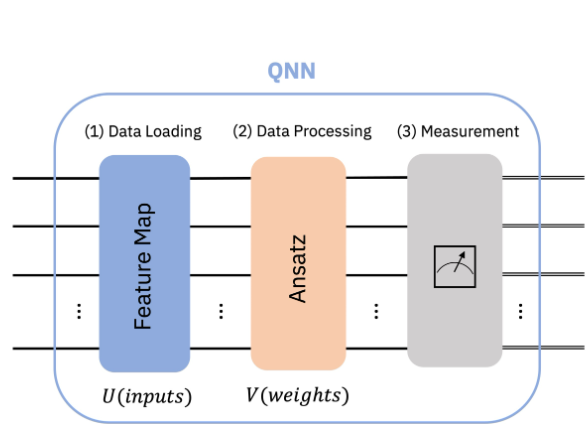

Lo que hacemos es que primero metemos los datos en un feature map para cmabiarlo de diemnsión y adaptarlos al modelo cuántico. Debemos rotar los datos, en función tambien de este mapeo obtendremos mejor o peores resultados.

A continuación apraece en Ansatz que básicament es como se ajustan los pesos, equivale a los pesos de una red neuronal clásica.

Y por útimo realizamos las mediciones de las predciciones y sacamos el rendimiento del modelo.

### Estimator QNN

Al estimator le damos un observable, las propiedades desde el punto de vista cuántico tienen que ver con el observador.

Cuando se mide, es cuando se definen las propiedades, no tenemos una medida hasta que no miramos, pero miramos desde una dirección concreta.

Un observable es una cosa que podemos descomponer en x,y,z para cada uno de los qubits.

Si tengo un circuito con 3 qubits, puedo decir que una medida de esto es zzz, que es medir todos en la dirección z

Cuando yo mido no peudo medir las 3 proyecciones a la vez, si quiero medir las 3 tengo que repetirlo 3 veces distintas, y estos valores ya están condicionados por la medición anterior

En una esfera de Bloch se puede medir en infinitas direcciones

Cuando ponemos puerta de Hadamard 'giramos' la esfera de BLoch

Solo podemos medir en la puerta Z



In [23]:
!pip install qiskit
!pip install qiskit_machine_learning

Esto recibe la combinación de FM y Ansatz, le das el circuito completo, y le das el obesrvable, en función de lo que vas a medir, y definimos las entradas y pesos (que está dentro de qc1)

El observable tiene que ver con el circuito con el número de qubits

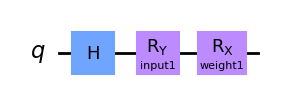

Aquí tenemos que mi rotación (FeatureMap) es la puerta de hadamard y Ry, y Rx es mi Ansatz

Cuando lo hace con el sampler, no tiene en cuenta la operación del observable, porque te mide varias veces y te devuelve la distribución, gestionate tu la información, va por epochs

Tomas unos datos y mides

### Crear modelo

Vamos a hacer un modelo para clasificar las flores utilizando lo de redes neuronales.

In [24]:
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
algorithm_globals.random_seed = 42

<ipython-input-24-3acff7b73554>:5: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 42


ESTIMATOR

Se hace un paso forward y un paso backwards

In [25]:
from qiskit import QuantumCircuit
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.neural_networks import EstimatorQNN

In [26]:
pip install pylatexenc

In [27]:
pip install matplotlib pylatexenc

El estimator toma como entrada un circuito cuántico parametrizado, así como un observable, este genera cálculos de valor esperado para el paso hacia adelante.

Ahora construiremos el circuito.

In [28]:
inputs2 = ParameterVector("input", 4)
weights2 = ParameterVector("weight", 2)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.rx(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.rz(inputs2[2], 0)
qc2.rz(inputs2[3], 1)
qc2.cx(0, 1) #CNOT
qc2.rx(weights2[0], 0)
qc2.rx(weights2[1], 1)


qc2.draw()

input parameters: ['input[0]', 'input[1]', 'input[2]', 'input[3]']
weight parameters: ['weight[0]', 'weight[1]']


┌──────────────┐┌──────────────┐     ┌───────────────┐
q_0: ┤ Rx(input[0]) ├┤ Rz(input[2]) ├──■──┤ Rx(weight[0]) ├
     ├──────────────┤├──────────────┤┌─┴─┐├───────────────┤
q_1: ┤ Ry(input[1]) ├┤ Rz(input[3]) ├┤ X ├┤ Rx(weight[1]) ├
     └──────────────┘└──────────────┘└───┘└───────────────┘

Y ahora creamos los observables (la capa de salidas tiene tantas salidas como observables tenga.

In [29]:
observable1 = SparsePauliOp.from_list([("Z" * qc2.num_qubits, 1)])
observable2 = SparsePauliOp.from_list([("Z" * qc2.num_qubits, 1)])
# el 1 es el peso que se aplica
observables = [observable1, observable2]

Se crea el estimator:
- input_params: lista de parámetros de circuitos cuánticos que deben tratarse como «entradas de red»

- weight_params: lista de parámetros de circuitos cuánticos que deben tratarse como «pesos de red»

In [30]:
estimator_qnn = EstimatorQNN(
    circuit=qc2, observables=observables, input_params=inputs2, weight_params=weights2
)
estimator_qnn

Ahora comenzamos a crear el paso hacia delante y hacia atrás

In [31]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

<ipython-input-31-a6c9269d2f11>:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
<ipython-input-31-a6c9269d2f11>:2: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 


In [32]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}")
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}")

Number of input features for EstimatorQNN: 4 
Input: [0.77395605 0.43887844 0.85859792 0.69736803]
Number of trainable weights for EstimatorQNN: 2 
Weights: [0.09417735 0.97562235]


FORWARD (paso hacia delante sin lotes)

In [33]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.700552 0.700552]]. 
Shape: (1, 2)


FORWARD (paso hacia delante con lotes)

In [34]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.700552 0.700552]
 [0.700552 0.700552]].  
Shape: (2, 2)


BACKWARD (sin Gradientes de Entrada)

In [35]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[-0.38320914 -0.63042956]
  [-0.38320914 -0.63042956]]].  
Shape: (1, 2, 2)


BACKWARD (con Gradientes de Entrada)

In [36]:
estimator_qnn.input_gradients = True

In [37]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[-0.03036863  0.27578853 -0.02562577  0.27760278]
  [-0.03036863  0.27578853 -0.02562577  0.27760278]]].  
Shape: (1, 2, 4)
Weight gradients for EstimatorQNN: [[[-0.38320914 -0.63042956]
  [-0.38320914 -0.63042956]]].  
Shape: (1, 2, 2)


El clasificador necesita el estimator, el callback para graficarlo y un optimizador clásico que es el que me va cambiando los pesos.

Como es un optimizador clásicos vamos a coger uno de los que  ya existen, ADAM.

COBYLA funciona mejor si tiene mínimos locales

Hemos creado el clasificador, que funciona como cualquier otro modelo de scikit - leanr, lo entrenamos, y hacemos el predict.

Lo interesante es el callback que nos va a dejar pintado cómo ha ido aprendiendo

Como estamos usando ese optimizador, la gráfica tipica sería una en la que no da esos saltos, los saltos aquí son por dos cosas :
- el optimizador da saltos para no meterse en mínimos locales.
- Cuando tenemos entrelazamiento y cambiamos los parámetros, el comportamiento es un poco más complejo.

## Lo implementamos en la base de datos del principio

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals
from sklearn.metrics import accuracy_score

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

In [39]:
df1 = pd.read_csv('Iris.csv',sep=',')
df1.head()
X = df1.drop(["Species", "Id"],axis=1).values
y = df1["Species"].values
df1 = df1[(df1['Species']=='Iris-virginica') | (df1['Species']=='Iris-versicolor')]
df1['Species'] = df1['Species'].map({'Iris-virginica':0,'Iris-versicolor':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [41]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

Le pasamos el estimator, que hemos creado.

Empezamos con un optimizador COBYLA, con un limite de 60 iteraciones (es un limite pequeño) si se trabaja con Cobyla, hay que darle hasta 500 iteraciones, si le ponemos un numero pequeño no nos va a encontrar los parámetros nuevos.


Aquí creamos una figura, y le decimos al clasificador que entrene, y le metemos el x_train y_train, y así nos va pintando según va haciendo, a medida que llama al callback lo dibuja.

Entrenar esto lleva mucho tiempo ya que toma todo nuestro conjunto de entrenamiento y calcula los parametros de entrenamiento. Este fit cuesta mas que con los SVM, por lo que primero hacemos un subconjunto de datos pequeño 5 - 10 filas

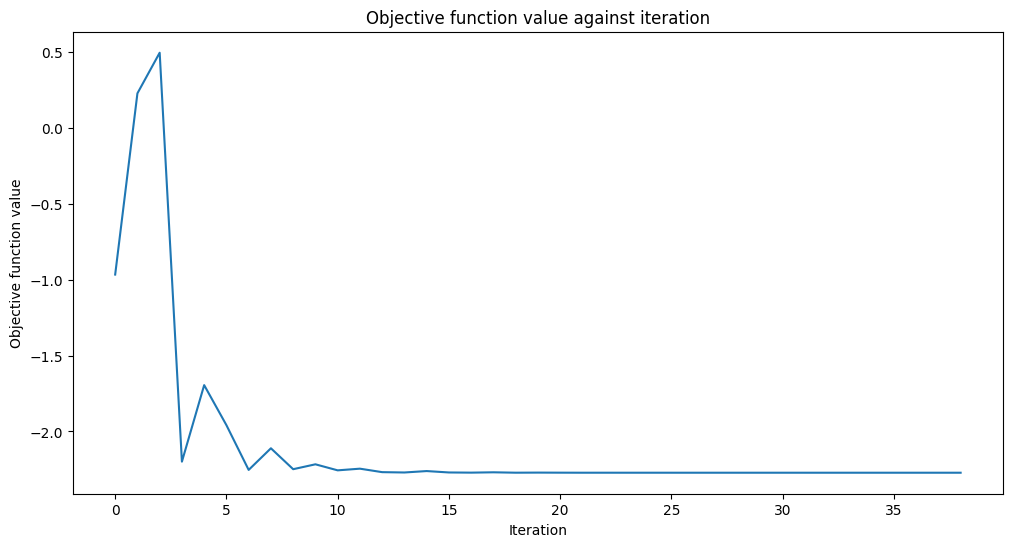

0.4222222222222222


In [42]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
predicciones_clasicas = estimator_classifier.predict(X_test)
valor = accuracy_score(y_test, predicciones_clasicas)
print(valor)

Lo bueno suele ser coger un tamaño pequeño, y un limite de iteraciones tipo 10.

### Pytorch

El siguente paso que vamos a seguir escombinar la forma de las NN con las QNN.

In [43]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F
from qiskit_machine_learning.connectors import TorchConnector

Paso 2: Definición del Modelo Híbrido y de la QNN

In [44]:
# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

In [45]:
# Define torch NN module


class Net(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,4)
        self.hidden_layer1  = nn.Linear(4,2)
        self.hidden_layer2  = nn.Linear(2,4)
        self.qnn = TorchConnector(qnn)  # Apply torch connector
        self.output_layer   = nn.Linear(2,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        x = self.qnn(x)  # apply QNN
        out =  self.output_layer(out)
        return out

model4 = Net(qnn4)

Paso 3: Entrenamiento

In [53]:
from torch.utils.data import Dataset, DataLoader
batch_size = 2

# Definir un conjunto de datos train
class MiDataset(Dataset):
    def _init_(self):
        self.datos = torch.FloatTensor(X_train)
        self.etiquetas = torch.LongTensor(y_train)

    def _len_(self):
        return len(self.datos)

    def _getitem_(self, idx):
        return self.datos[idx], self.etiquetas[idx]

# Crear una instancia del conjunto de datos y un DataLoader
mi_dataset = MiDataset()
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

In [62]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

RuntimeError: ignored

In [ ]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

In [ ]:
torch.save(model4.state_dict(), "model4.pt")

Paso 4: Evaluación

In [ ]:
qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("model4.pt"))

In [ ]:
model5.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model5(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

In [ ]:
# Plot predicted labels

n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model5.eval()
with no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model5(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        axes[count].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

FIN CREO

In [ ]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

In [ ]:
# Set up a circuit
feature_map = ZZFeatureMap(input_dim)
ansatz = RealAmplitudes(input_dim)
qc = QuantumCircuit(input_dim)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")

In [ ]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

# Set up PyTorch module
# Note: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn1.num_weights) - 1)
model1 = TorchConnector(qnn1, initial_weights=initial_weights)
print("Initial weights: ", initial_weights)

In [ ]:
# Define optimizer and loss
optimizer = LBFGS(model1.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Note from (https://pytorch.org/docs/stable/optim.html):
# Some optimization algorithms such as LBFGS need to
# reevaluate the function multiple times, so you have to
# pass in a closure that allows them to recompute your model.
# The closure should clear the gradients, compute the loss,
# and return it.
def closure():
    optimizer.zero_grad()  # Initialize/clear gradients
    loss = f_loss(model1(X), y_)  # Evaluate loss function
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer step4
optimizer.step(closure)